In [1]:
import numpy as np
import pandas as pd
np.random.seed(123)  # for reproducibility

import matplotlib.pyplot as plt

<bound method NDFrame.head of       num_param  conv_1_size  conv_2_size  conv_3_size  fc_1_size  fc_2_size  \
0       87243.0        500.0          0.0          0.0    84550.0     2193.0   
1      173943.0        500.0          0.0          0.0   169100.0     4343.0   
2      347343.0        500.0          0.0          0.0   338200.0     8643.0   
3      520743.0        500.0          0.0          0.0   507300.0    12943.0   
4      694143.0        500.0          0.0          0.0   676400.0    17243.0   
...         ...          ...          ...          ...        ...        ...   
1075   682683.0      10000.0     640200.0      32010.0        0.0       43.0   
1076   812443.0      10000.0     640200.0     160050.0        0.0       43.0   
1077   974643.0      10000.0     640200.0     320100.0        0.0       43.0   
1078  1136843.0      10000.0     640200.0     480150.0        0.0       43.0   
1079  1299043.0      10000.0     640200.0     640200.0        0.0       43.0   

      tes

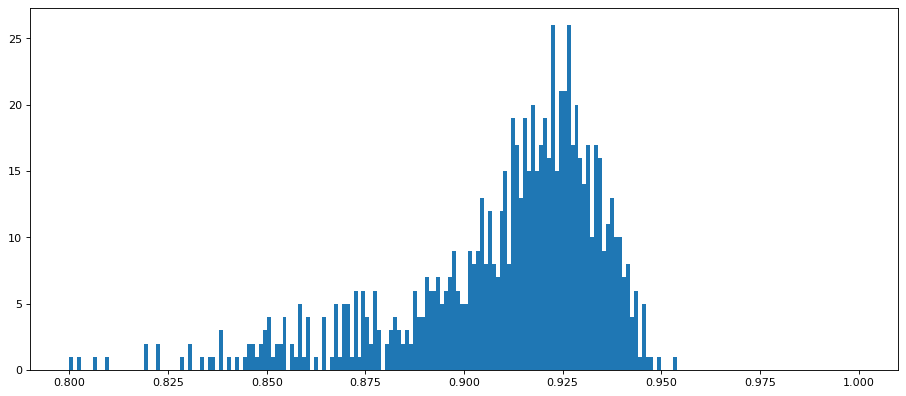

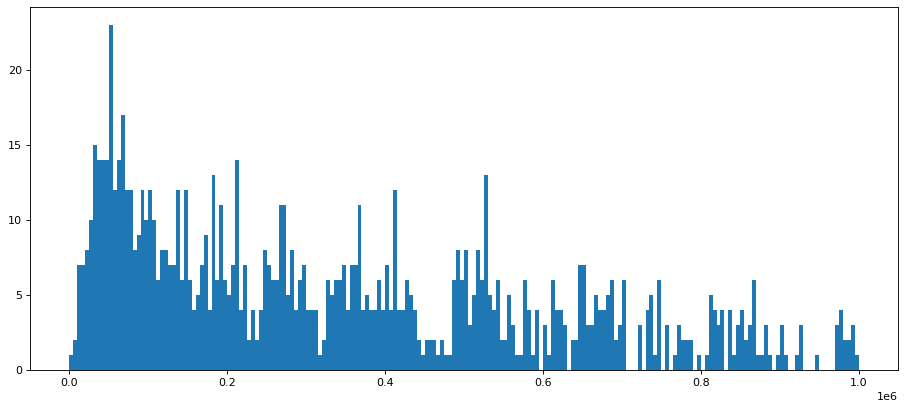

In [2]:
#results = np.loadtxt("Model_Comparison_Results.csv", delimiter=',')
header = ('num_param', 'conv_1_size', 'conv_2_size', 'conv_3_size', 'fc_1_size', 'fc_2_size', 'test_acc',\
          'test_loss', 'conv_1_elem', 'conv_2_elem', 'conv_3_elem', 'fc_1_elem')

results = pd.read_csv("Model_Comparison_Results.csv", names=header) 

print(results.head)

plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(results['test_acc'], range=(0.8, 1), bins=200)
plt.show()
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(results['num_param'], range=(0,1e6), bins=200)
plt.show()

In [3]:
weighted_score = 0.25*(1-results['test_loss'])+0.75*results['num_param']

results['weighted_score'] = weighted_score

print(results)

      num_param  conv_1_size  conv_2_size  conv_3_size  fc_1_size  fc_2_size  \
0       87243.0        500.0          0.0          0.0    84550.0     2193.0   
1      173943.0        500.0          0.0          0.0   169100.0     4343.0   
2      347343.0        500.0          0.0          0.0   338200.0     8643.0   
3      520743.0        500.0          0.0          0.0   507300.0    12943.0   
4      694143.0        500.0          0.0          0.0   676400.0    17243.0   
...         ...          ...          ...          ...        ...        ...   
1075   682683.0      10000.0     640200.0      32010.0        0.0       43.0   
1076   812443.0      10000.0     640200.0     160050.0        0.0       43.0   
1077   974643.0      10000.0     640200.0     320100.0        0.0       43.0   
1078  1136843.0      10000.0     640200.0     480150.0        0.0       43.0   
1079  1299043.0      10000.0     640200.0     640200.0        0.0       43.0   

      test_acc  test_loss  conv_1_elem 

In [4]:
# Index
# 'num_param', 'conv_1_size', 'conv_2_size', 'conv_3_size', 'fc_1_size', 'fc_2_size', 'test_acc', 'test_loss',
# 'conv_1_elem', 'conv_2_elem', 'conv_3_elem', 'fc_1_elem'

sorted_by_accuracy = results.sort_values('test_acc', axis=0, ascending=False)
print(sorted_by_accuracy.head())

sorted_by_loss = results.sort_values('test_loss', axis=0)
print(sorted_by_loss.head())

sorted_by_score = results.sort_values('weighted_score', axis=0)
print(sorted_by_score.head())

     num_param  conv_1_size  conv_2_size  conv_3_size  fc_1_size  fc_2_size  \
178   746143.0        500.0      32200.0     640200.0    60300.0    12943.0   
316   377193.0       2500.0     120150.0     240100.0    10100.0     4343.0   
113   314993.0        500.0      16100.0     240150.0    45300.0    12943.0   
325   615093.0       2500.0     120150.0     480200.0    10050.0     2193.0   
537  1014243.0       5000.0     320200.0     640200.0    40200.0     8643.0   

     test_acc  test_loss  conv_1_elem  conv_2_elem  conv_3_elem  fc_1_elem  \
178  0.953048   0.454398         10.0        200.0        200.0      300.0   
316  0.949565   0.514681         50.0        150.0        100.0      100.0   
113  0.947902   0.602869         10.0        100.0        150.0      300.0   
325  0.946873   0.852856         50.0        150.0        200.0       50.0   
537  0.945843   0.684565        100.0        200.0        200.0      200.0   

     weighted_score  
178   559607.386400  
316   282894

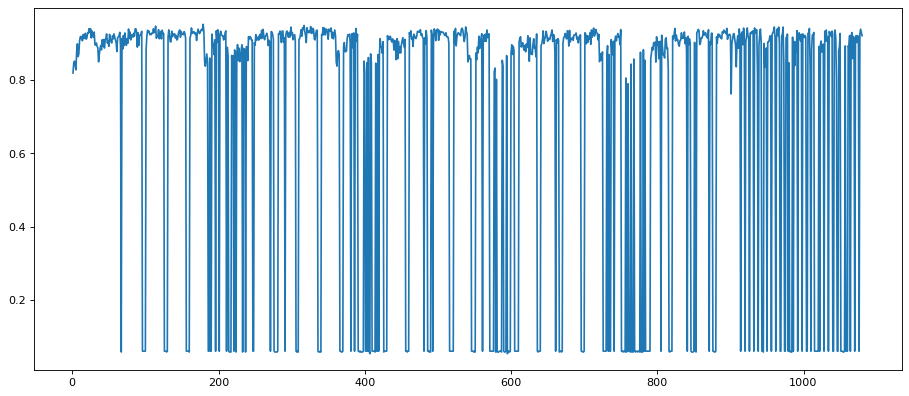

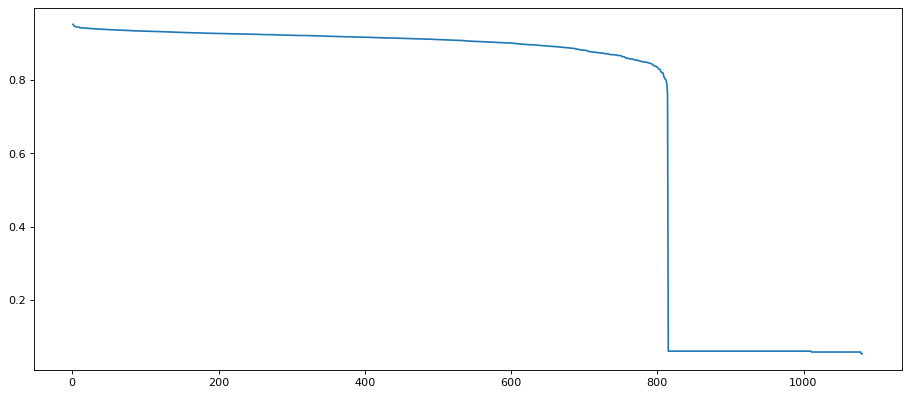

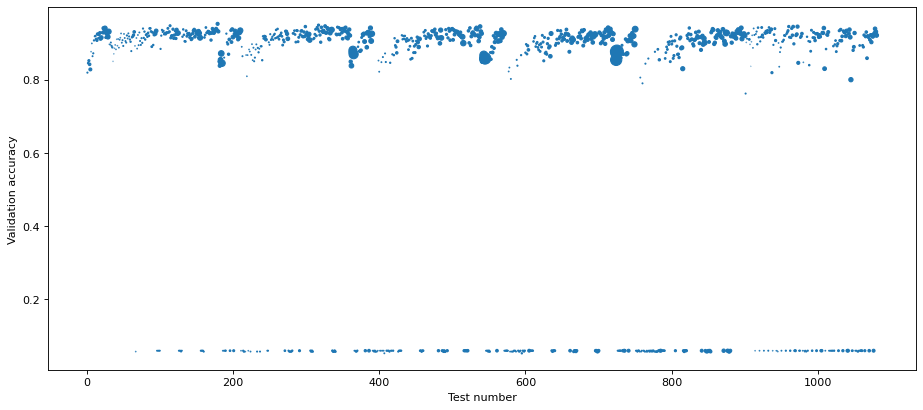

In [5]:
tests = np.linspace(1, results.shape[0], results.shape[0])
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tests, results['test_acc'])
plt.show()
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tests, sorted_by_accuracy['test_acc'])
plt.show()

plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(tests, results['test_acc'], results['num_param']/1e5)
plt.xlabel("Test number")
plt.ylabel("Validation accuracy")
plt.show()

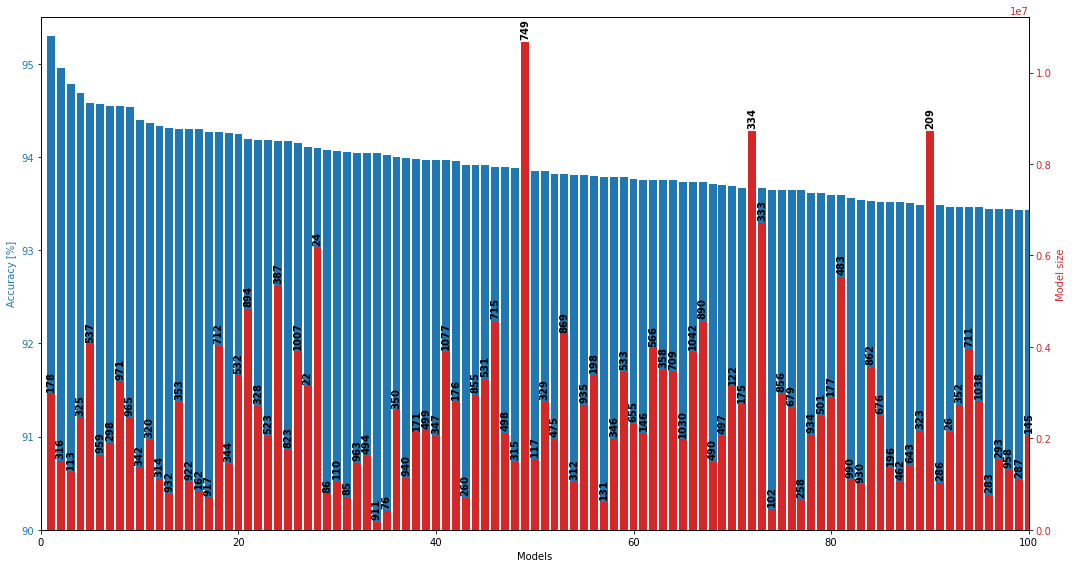

In [6]:
n_to_plot = 100

fig, acc = plt.subplots(figsize=(15,8))

color = 'tab:blue'
acc.set_xlabel('Models')
acc.set_ylabel("Accuracy [%]", color=color)
acc.bar(tests[0:n_to_plot], sorted_by_accuracy['test_acc'].iloc[0:100]*100)
acc.axis([0, n_to_plot, 90, 95.5])
acc.tick_params(axis='y', labelcolor=color)

par = acc.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
par.set_ylabel('Model size', color=color)  # we already handled the x-label with ax1
par.bar(tests[0:n_to_plot], sorted_by_accuracy['num_param'].iloc[0:100]*4, color=color)
par.tick_params(axis='y', labelcolor=color)

# Printing the model number
for i, v in enumerate(sorted_by_accuracy['num_param'].iloc[0:100].index):
    par.text(i+0.5, sorted_by_accuracy['num_param'].iloc[i]*4+100000, str(v), fontweight='bold', rotation=90)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

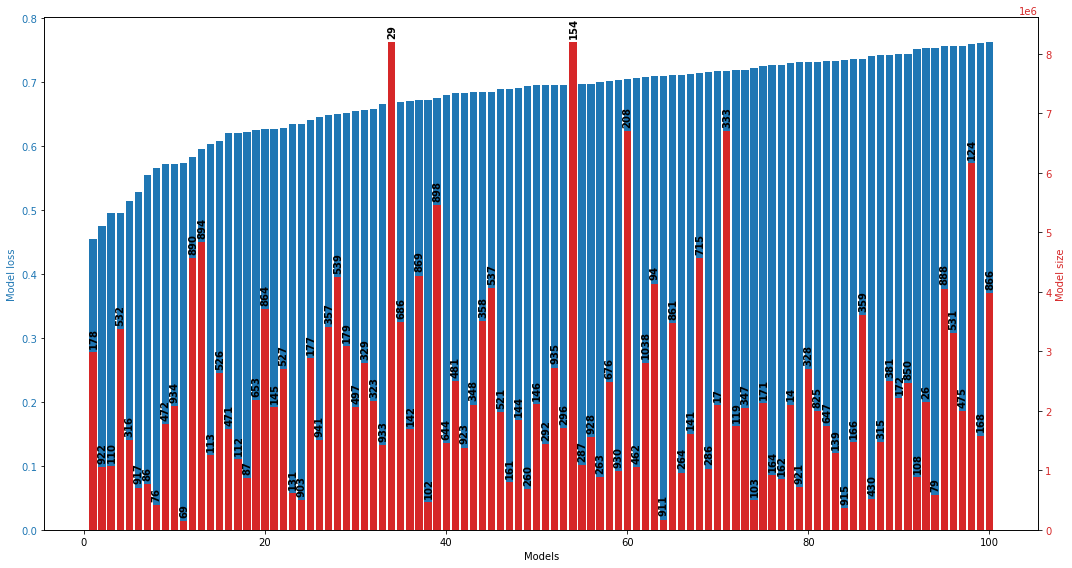

In [7]:
n_to_plot = 100

fig, acc = plt.subplots(figsize=(15,8))

color = 'tab:blue'
acc.set_xlabel('Models')
acc.set_ylabel("Model loss", color=color)
acc.bar(tests[0:n_to_plot], sorted_by_loss['test_loss'].iloc[0:100])
acc.tick_params(axis='y', labelcolor=color)

par = acc.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
par.set_ylabel('Model size', color=color)  # we already handled the x-label with ax1
par.bar(tests[0:n_to_plot], sorted_by_loss['num_param'].iloc[0:100]*4, color=color)
par.tick_params(axis='y', labelcolor=color)

# Printing the model number
for i, v in enumerate(sorted_by_loss['num_param'].iloc[0:100].index):
    par.text(i+0.5, sorted_by_loss['num_param'].iloc[i]*4+100000, str(v), fontweight='bold', rotation=90)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [8]:
# Observe graphically that model 70 works pretty well
results.iloc[76]

num_param         103093.000000
conv_1_size          500.000000
conv_2_size         8050.000000
conv_3_size        80100.000000
fc_1_size          10100.000000
fc_2_size           4343.000000
test_acc               0.940222
test_loss              0.565373
conv_1_elem           10.000000
conv_2_elem           50.000000
conv_3_elem          100.000000
fc_1_elem            100.000000
weighted_score     77319.858657
Name: 76, dtype: float64